In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# %pip install -q transformers
# %pip install -q transformers[torch]
# %pip install -q datasets
# %pip install -q accelerate -U
# %pip install -q emoji
# %pip install -q wandb
# %pip install -q evaluate

In [3]:
!wandb login bacfbeff4ac8ffcee97582cf80877abda3dc7b37

wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\quynd\.netrc


In [4]:
# !git clone https://huggingface.co/papluca/xlm-roberta-base-language-detection

In [5]:
import pandas as pd

df = pd.read_csv(r"D:\Code\AISIA\cleaned_data.csv", index_col=0)
df

C:\Users\quynd\AppData\Local\Temp\ipykernel_24312\3184970133.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"D:\Code\AISIA\cleaned_data.csv", index_col=0)


,score,title,review,language
0,5.0,Very good hotel,"Good hotel i have ever stayed in Vietnam, good...",en
1,4.0,BUEN ALOJAMIENTO QUE GANARIA MUCHO MEJORANDO E...,Este hotel está muy cerca del barrio de las em...,es
2,5.0,Great place in Cau Giay,This place was very nice. Our bedroom were cle...,en
3,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,vi
4,5.0,Perfect stay,It was a amazing hotel. They helped very good ...,en
...,...,...,...,...
784026,5.0,乾淨整潔，交通方便,位於峴港市區，距離韓江橋或韓市場都不會太遠，店員很熱心，還可以幫忙預訂摩托車跟行程，非常值得...,zh
784027,5.0,Check this place,My friend and I received excellent and profess...,en
784028,5.0,店员给了我们很多帮助，装修简单精致，卫生很好,这是我们此行到越南第一个入住的酒店，也是呆的时间最长的酒店。酒店原本是一家咖啡店，其次楼上有...,zh
784029,5.0,Công tác,Rất tuyệt vời... khi đến đây tôi cảm giác thoả...,vi


In [6]:
vi_df = df[df['language'] == 'vi']
vi_df

,score,title,review,language
3,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,vi
8,5.0,Tuyệt vời,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...",vi
9,5.0,trải nghiệm tuyệt vời tại Brandi Gate,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...",vi
16,5.0,"Good hotel, good room rates","During the last visit to Hanoi, in April 2019,...",vi
64,1.0,"Tồi , lừa đảo",Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,vi
...,...,...,...,...
783985,5.0,Lần thứ 2 quay lại,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,vi
784010,4.0,Giá rẻ nhân viên thân thiện,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,vi
784013,5.0,"Giá rẻ, đồ ăn ngon","Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...",vi
784016,5.0,Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng,"Khách sạn với nội thất tuyệt vời , phòng rất r...",vi


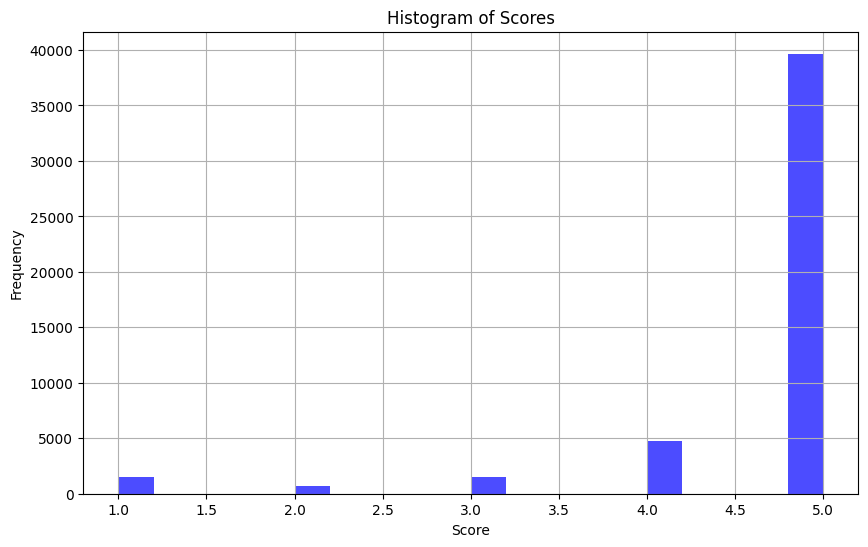

In [7]:
import matplotlib.pyplot as plt

# Convert 'score' column to numeric
vi_df.loc[:, 'score'] = pd.to_numeric(vi_df['score'], errors='coerce')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(vi_df['score'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Splitting the dataset
train_df, test_df = train_test_split(vi_df, test_size=0.2, stratify=vi_df['score'])

# Display the shape of train and test sets
print("Train set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

Train set shape: (38481, 4)
Test set shape: (9621, 4)


In [9]:
vi_df['score'] = vi_df['score'].astype(float)
label_counts = vi_df['score'].value_counts()
label_counts

C:\Users\quynd\AppData\Local\Temp\ipykernel_24312\2394121442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vi_df['score'] = vi_df['score'].astype(float)


score
5.0    39665
4.0     4777
3.0     1502
1.0     1492
2.0      666
Name: count, dtype: int64

In [10]:
vi_df.reset_index(drop=True, inplace=True)
vi_df

,score,title,review,language
0,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,vi
1,5.0,Tuyệt vời,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...",vi
2,5.0,trải nghiệm tuyệt vời tại Brandi Gate,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...",vi
3,5.0,"Good hotel, good room rates","During the last visit to Hanoi, in April 2019,...",vi
4,1.0,"Tồi , lừa đảo",Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,vi
...,...,...,...,...
48097,5.0,Lần thứ 2 quay lại,Vừa rồi tham gia cuộc thi sắc đẹp cho doanh nh...,vi
48098,4.0,Giá rẻ nhân viên thân thiện,Gia đình chúng tôi gồm bố mẹ và 1 bé 4 tuổi đã...,vi
48099,5.0,"Giá rẻ, đồ ăn ngon","Thấy khách sạn lâu rồi mà không dám vào ở, sợ ...",vi
48100,5.0,Kỳ nghỉ tháng 10 năm 2017 tại Đà Nẵng,"Khách sạn với nội thất tuyệt vời , phòng rất r...",vi


In [11]:
single_samlpe_vi_df = vi_df.iloc[:10]
first_row_df = pd.DataFrame(single_samlpe_vi_df)
first_row_df

,score,title,review,language
0,5.0,TRẢI NGHIỆM TỐT,Đầy đủ dịch vụ tiện nghi Ăn sáng buffee ngon H...,vi
1,5.0,Tuyệt vời,"Khách sạn mới, sạch sẽ, có bar và bể bơi ở tần...",vi
2,5.0,trải nghiệm tuyệt vời tại Brandi Gate,"Khách sạn mới 100% tọa lạc trước sông Tô Lịch,...",vi
3,5.0,"Good hotel, good room rates","During the last visit to Hanoi, in April 2019,...",vi
4,1.0,"Tồi , lừa đảo",Mình đặt 2 phòng ở 3 đêm từ 30/11-3/12 . Vì có...,vi
5,1.0,Very bad,Diện tích phòng quá nhỏ. Trang thiết bị quá cũ...,vi
6,1.0,Lừa đảo,Tôi đặt nhầm số lượng phòng của khách sạn này ...,vi
7,5.0,Dich vu rat tot,Nhân viên khanh phục vụ ăn uống buổi sáng cho ...,vi
8,5.0,Khách sạn vui vẻ !,Kì nghỉ vừa rồi mình cùng vợ đi du lịch Hà Nội...,vi
9,5.0,Tận hưởng tuần trăng mật thú vị,"Tranh thủ thời gian sau ngày lễ cưới, 2 vợ chồ...",vi


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from transformers.integrations import TensorBoardCallback
import torch

# Tokenization
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)

c:\Users\quynd\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [13]:
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import torch


class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length, num_classes):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.num_classes = num_classes

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        review = str(self.data.review[index])
        label = int(self.data.score[index]) - 1 # Assuming score is integer-encoded label
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )
        # One-hot encode the label
        labels = torch.zeros(self.num_classes)
        labels[label] = 1
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': labels  # Use one-hot encoded labels
        }


In [14]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = CustomDataset(vi_df, tokenizer, 256, 5)

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=0)  # Splitting data for training
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)

In [15]:
# Define Model Architecture
model = AutoModelForSequenceClassification.from_pretrained("vinai/phobert-base", num_labels=5)  # Regression: 1 output neuron

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['

In [16]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error
from transformers import TrainingArguments, Trainer
import evaluate

# Fine-tuning
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=25,
    report_to="wandb",
    learning_rate=2e-5,
    warmup_steps=500,
    weight_decay=0.01,
)

def compute_metrics(pred):
    labels = pred.label_ids
    logits = pred.predictions
    
    # Convert logits to predicted labels
    preds = np.argmax(logits, axis=-1)
    
    # Calculate MSE
    mse_per_example = []
    for i in range(len(labels)):
        mse_per_example.append(mean_squared_error(labels[i], logits[i]))

    mse = np.mean(mse_per_example)

    # Calculate Accuracy
    def convert_to_score(one_hot_label):
        for i, val in enumerate(one_hot_label):
            if val == 1:
                return i
        return None

    accuracy_per_example = []
    for i in range(len(labels)):
        true_score = convert_to_score(labels[i])
        pred_score = preds[i]

        if true_score is not None:
            accuracy_per_example.append(1 if true_score == pred_score else 0)

    accuracy = sum(accuracy_per_example) / len(accuracy_per_example)

    # Calculate F1 score
    true_scores = []
    pred_scores = []
    for i in range(len(labels)):
        true_score = convert_to_score(labels[i])
        pred_score = preds[i]

        true_scores.append(true_score)
        pred_scores.append(pred_score)

    f1 = f1_score(true_scores, pred_scores, average='weighted')

    return {"mse": mse, "accuracy": accuracy, "f1_score": f1}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# Start fine-tuning
trainer.train()

# Evaluation
trainer.evaluate()


c:\Users\quynd\AppData\Local\Programs\Python\Python39\lib\site-packages\transformers\optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: quyqp1505 (quyqp). Use `wandb login --relogin` to force relogin


  0%|          | 25/12030 [00:35<4:42:13,  1.41s/it]

{'loss': 0.6614, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.01}


  0%|          | 50/12030 [01:10<4:38:50,  1.40s/it]

{'loss': 0.5943, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.02}


  1%|          | 75/12030 [01:45<4:39:29,  1.40s/it]

{'loss': 0.4971, 'learning_rate': 3e-06, 'epoch': 0.03}


  1%|          | 100/12030 [02:24<5:34:28,  1.68s/it]

{'loss': 0.4008, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.04}


  1%|          | 125/12030 [03:28<14:05:52,  4.26s/it]

{'loss': 0.3449, 'learning_rate': 5e-06, 'epoch': 0.05}


  1%|          | 150/12030 [04:44<5:05:44,  1.54s/it] 

{'loss': 0.2937, 'learning_rate': 6e-06, 'epoch': 0.06}


  1%|▏         | 175/12030 [05:23<5:18:04,  1.61s/it]

{'loss': 0.2951, 'learning_rate': 7e-06, 'epoch': 0.07}


  2%|▏         | 200/12030 [06:40<13:36:08,  4.14s/it]

{'loss': 0.2787, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.08}


  2%|▏         | 225/12030 [07:48<5:05:33,  1.55s/it] 

{'loss': 0.2609, 'learning_rate': 9e-06, 'epoch': 0.09}


  2%|▏         | 250/12030 [08:28<5:30:55,  1.69s/it]

{'loss': 0.2476, 'learning_rate': 1e-05, 'epoch': 0.1}


  2%|▏         | 275/12030 [10:04<13:32:23,  4.15s/it]

{'loss': 0.2348, 'learning_rate': 1.1000000000000001e-05, 'epoch': 0.11}


  2%|▏         | 300/12030 [11:00<5:08:43,  1.58s/it] 

{'loss': 0.223, 'learning_rate': 1.2e-05, 'epoch': 0.12}


  3%|▎         | 325/12030 [11:44<7:58:57,  2.46s/it]

{'loss': 0.2019, 'learning_rate': 1.3000000000000001e-05, 'epoch': 0.14}


  3%|▎         | 350/12030 [13:30<13:40:59,  4.22s/it]

{'loss': 0.1957, 'learning_rate': 1.4e-05, 'epoch': 0.15}


  3%|▎         | 375/12030 [14:10<5:06:57,  1.58s/it] 

{'loss': 0.1865, 'learning_rate': 1.5000000000000002e-05, 'epoch': 0.16}


  3%|▎         | 400/12030 [15:07<12:28:52,  3.86s/it]

{'loss': 0.1946, 'learning_rate': 1.6000000000000003e-05, 'epoch': 0.17}


  4%|▎         | 425/12030 [16:41<7:26:02,  2.31s/it] 

{'loss': 0.1881, 'learning_rate': 1.7e-05, 'epoch': 0.18}


  4%|▎         | 450/12030 [17:21<5:14:55,  1.63s/it]

{'loss': 0.1745, 'learning_rate': 1.8e-05, 'epoch': 0.19}


  4%|▍         | 475/12030 [18:28<13:23:05,  4.17s/it]

{'loss': 0.1725, 'learning_rate': 1.9e-05, 'epoch': 0.2}


  4%|▍         | 500/12030 [19:51<5:16:08,  1.65s/it] 

{'loss': 0.1516, 'learning_rate': 2e-05, 'epoch': 0.21}


  4%|▍         | 525/12030 [20:35<5:10:45,  1.62s/it]

{'loss': 0.1844, 'learning_rate': 1.9956634865568086e-05, 'epoch': 0.22}


  5%|▍         | 550/12030 [21:48<13:07:59,  4.12s/it]

{'loss': 0.1587, 'learning_rate': 1.991326973113617e-05, 'epoch': 0.23}


  5%|▍         | 575/12030 [23:02<4:56:48,  1.55s/it] 

{'loss': 0.1733, 'learning_rate': 1.986990459670425e-05, 'epoch': 0.24}


  5%|▍         | 600/12030 [23:42<5:15:32,  1.66s/it]

{'loss': 0.1472, 'learning_rate': 1.9826539462272335e-05, 'epoch': 0.25}


  5%|▌         | 625/12030 [25:08<13:07:22,  4.14s/it]

{'loss': 0.1436, 'learning_rate': 1.978317432784042e-05, 'epoch': 0.26}


  5%|▌         | 650/12030 [26:16<4:56:52,  1.57s/it] 

{'loss': 0.1679, 'learning_rate': 1.9739809193408503e-05, 'epoch': 0.27}


  6%|▌         | 675/12030 [26:56<5:19:47,  1.69s/it]

{'loss': 0.1468, 'learning_rate': 1.9696444058976584e-05, 'epoch': 0.28}


  6%|▌         | 700/12030 [28:39<13:18:10,  4.23s/it]

{'loss': 0.172, 'learning_rate': 1.9653078924544668e-05, 'epoch': 0.29}


  6%|▌         | 725/12030 [29:32<4:51:36,  1.55s/it] 

{'loss': 0.1516, 'learning_rate': 1.960971379011275e-05, 'epoch': 0.3}


  6%|▌         | 750/12030 [30:22<10:45:38,  3.43s/it]

{'loss': 0.1398, 'learning_rate': 1.9566348655680833e-05, 'epoch': 0.31}


  6%|▋         | 775/12030 [32:06<12:57:08,  4.14s/it]

{'loss': 0.1635, 'learning_rate': 1.9522983521248917e-05, 'epoch': 0.32}


  7%|▋         | 800/12030 [32:45<5:05:29,  1.63s/it] 

{'loss': 0.1376, 'learning_rate': 1.9479618386817e-05, 'epoch': 0.33}


  7%|▋         | 825/12030 [33:48<12:45:41,  4.10s/it]

{'loss': 0.1709, 'learning_rate': 1.9436253252385085e-05, 'epoch': 0.34}


  7%|▋         | 850/12030 [35:18<5:45:40,  1.86s/it] 

{'loss': 0.1356, 'learning_rate': 1.939288811795317e-05, 'epoch': 0.35}


  7%|▋         | 875/12030 [35:58<5:11:35,  1.68s/it]

{'loss': 0.1306, 'learning_rate': 1.934952298352125e-05, 'epoch': 0.36}


  7%|▋         | 900/12030 [37:16<12:45:23,  4.13s/it]

{'loss': 0.1582, 'learning_rate': 1.9306157849089334e-05, 'epoch': 0.37}


  8%|▊         | 925/12030 [38:33<4:52:58,  1.58s/it] 

{'loss': 0.1417, 'learning_rate': 1.9262792714657418e-05, 'epoch': 0.38}


  8%|▊         | 950/12030 [39:13<5:09:51,  1.68s/it]

{'loss': 0.1421, 'learning_rate': 1.9219427580225502e-05, 'epoch': 0.39}


  8%|▊         | 975/12030 [40:42<12:57:04,  4.22s/it]

{'loss': 0.1309, 'learning_rate': 1.9176062445793583e-05, 'epoch': 0.41}


  8%|▊         | 1000/12030 [41:46<4:43:54,  1.54s/it]

{'loss': 0.1678, 'learning_rate': 1.9132697311361667e-05, 'epoch': 0.42}


  9%|▊         | 1025/12030 [42:29<5:09:21,  1.69s/it]

{'loss': 0.1594, 'learning_rate': 1.9089332176929748e-05, 'epoch': 0.43}


  9%|▊         | 1050/12030 [44:10<12:54:48,  4.23s/it]

{'loss': 0.1664, 'learning_rate': 1.904596704249783e-05, 'epoch': 0.44}


  9%|▉         | 1075/12030 [45:01<4:48:59,  1.58s/it] 

{'loss': 0.1438, 'learning_rate': 1.9002601908065916e-05, 'epoch': 0.45}


  9%|▉         | 1100/12030 [45:49<9:48:33,  3.23s/it]

{'loss': 0.1559, 'learning_rate': 1.8959236773634e-05, 'epoch': 0.46}


  9%|▉         | 1125/12030 [47:33<12:31:21,  4.13s/it]

{'loss': 0.1356, 'learning_rate': 1.8915871639202084e-05, 'epoch': 0.47}


 10%|▉         | 1150/12030 [48:13<4:49:47,  1.60s/it] 

{'loss': 0.1416, 'learning_rate': 1.8872506504770168e-05, 'epoch': 0.48}


 10%|▉         | 1175/12030 [49:18<12:27:45,  4.13s/it]

{'loss': 0.1552, 'learning_rate': 1.882914137033825e-05, 'epoch': 0.49}


 10%|▉         | 1200/12030 [50:44<5:12:25,  1.73s/it] 

{'loss': 0.166, 'learning_rate': 1.8785776235906333e-05, 'epoch': 0.5}


 10%|█         | 1225/12030 [51:24<4:58:51,  1.66s/it]

{'loss': 0.1574, 'learning_rate': 1.8742411101474417e-05, 'epoch': 0.51}


 10%|█         | 1250/12030 [52:24<11:51:02,  3.96s/it]

{'loss': 0.1453, 'learning_rate': 1.86990459670425e-05, 'epoch': 0.52}


 11%|█         | 1275/12030 [53:48<5:02:22,  1.69s/it] 

{'loss': 0.1345, 'learning_rate': 1.8655680832610582e-05, 'epoch': 0.53}


 11%|█         | 1300/12030 [54:27<4:52:45,  1.64s/it]

{'loss': 0.1429, 'learning_rate': 1.8612315698178666e-05, 'epoch': 0.54}


 11%|█         | 1325/12030 [55:26<11:54:59,  4.01s/it]

{'loss': 0.1248, 'learning_rate': 1.8568950563746747e-05, 'epoch': 0.55}


 11%|█         | 1350/12030 [56:42<4:42:49,  1.59s/it] 

{'loss': 0.1377, 'learning_rate': 1.852558542931483e-05, 'epoch': 0.56}


 11%|█▏        | 1375/12030 [57:22<4:53:46,  1.65s/it]

{'loss': 0.1527, 'learning_rate': 1.8482220294882915e-05, 'epoch': 0.57}


 12%|█▏        | 1400/12030 [58:22<11:53:16,  4.03s/it]

{'loss': 0.1592, 'learning_rate': 1.8438855160451e-05, 'epoch': 0.58}


 12%|█▏        | 1425/12030 [59:35<4:38:29,  1.58s/it] 

{'loss': 0.1595, 'learning_rate': 1.8395490026019083e-05, 'epoch': 0.59}


 12%|█▏        | 1450/12030 [1:00:15<4:49:05,  1.64s/it]

{'loss': 0.1406, 'learning_rate': 1.8352124891587167e-05, 'epoch': 0.6}


 12%|█▏        | 1475/12030 [1:01:13<11:27:26,  3.91s/it]

{'loss': 0.148, 'learning_rate': 1.8308759757155248e-05, 'epoch': 0.61}


 12%|█▏        | 1500/12030 [1:02:25<4:30:11,  1.54s/it] 

{'loss': 0.1042, 'learning_rate': 1.8265394622723332e-05, 'epoch': 0.62}


 13%|█▎        | 1525/12030 [1:03:07<4:43:13,  1.62s/it]

{'loss': 0.1439, 'learning_rate': 1.8222029488291416e-05, 'epoch': 0.63}


 13%|█▎        | 1550/12030 [1:03:57<10:18:56,  3.54s/it]

{'loss': 0.1313, 'learning_rate': 1.81786643538595e-05, 'epoch': 0.64}


 13%|█▎        | 1575/12030 [1:05:17<4:40:09,  1.61s/it] 

{'loss': 0.1535, 'learning_rate': 1.813529921942758e-05, 'epoch': 0.65}


 13%|█▎        | 1600/12030 [1:05:56<4:37:32,  1.60s/it]

{'loss': 0.1432, 'learning_rate': 1.8091934084995665e-05, 'epoch': 0.67}


 14%|█▎        | 1625/12030 [1:06:39<5:59:43,  2.07s/it]

{'loss': 0.1242, 'learning_rate': 1.8048568950563746e-05, 'epoch': 0.68}


 14%|█▎        | 1650/12030 [1:08:05<5:03:51,  1.76s/it] 

{'loss': 0.1339, 'learning_rate': 1.800520381613183e-05, 'epoch': 0.69}


 14%|█▍        | 1675/12030 [1:08:44<4:31:06,  1.57s/it]

{'loss': 0.1452, 'learning_rate': 1.7961838681699914e-05, 'epoch': 0.7}


 14%|█▍        | 1700/12030 [1:09:24<4:41:04,  1.63s/it]

{'loss': 0.1342, 'learning_rate': 1.7918473547267998e-05, 'epoch': 0.71}


 14%|█▍        | 1725/12030 [1:10:53<5:18:32,  1.85s/it] 

{'loss': 0.1248, 'learning_rate': 1.7875108412836082e-05, 'epoch': 0.72}


 15%|█▍        | 1750/12030 [1:11:32<4:33:43,  1.60s/it]

{'loss': 0.1529, 'learning_rate': 1.7831743278404166e-05, 'epoch': 0.73}


 15%|█▍        | 1775/12030 [1:12:13<4:41:07,  1.64s/it]

{'loss': 0.114, 'learning_rate': 1.7788378143972247e-05, 'epoch': 0.74}


 15%|█▍        | 1800/12030 [1:13:40<6:29:40,  2.29s/it] 

{'loss': 0.1368, 'learning_rate': 1.774501300954033e-05, 'epoch': 0.75}


 15%|█▌        | 1825/12030 [1:14:19<4:30:27,  1.59s/it]

{'loss': 0.1419, 'learning_rate': 1.7701647875108415e-05, 'epoch': 0.76}


 15%|█▌        | 1850/12030 [1:15:00<4:40:59,  1.66s/it]

{'loss': 0.1321, 'learning_rate': 1.76582827406765e-05, 'epoch': 0.77}


 16%|█▌        | 1875/12030 [1:16:24<11:39:58,  4.14s/it]

{'loss': 0.1301, 'learning_rate': 1.761491760624458e-05, 'epoch': 0.78}


 16%|█▌        | 1900/12030 [1:17:06<4:18:38,  1.53s/it] 

{'loss': 0.129, 'learning_rate': 1.7571552471812664e-05, 'epoch': 0.79}


 16%|█▌        | 1925/12030 [1:17:45<4:28:45,  1.60s/it]

{'loss': 0.1502, 'learning_rate': 1.7528187337380745e-05, 'epoch': 0.8}


 16%|█▌        | 1950/12030 [1:19:17<11:46:25,  4.20s/it]

{'loss': 0.1446, 'learning_rate': 1.748482220294883e-05, 'epoch': 0.81}


 16%|█▋        | 1975/12030 [1:19:56<4:23:13,  1.57s/it] 

{'loss': 0.1443, 'learning_rate': 1.7441457068516913e-05, 'epoch': 0.82}


 17%|█▋        | 2000/12030 [1:20:37<4:34:41,  1.64s/it]

{'loss': 0.1085, 'learning_rate': 1.7398091934084997e-05, 'epoch': 0.83}


 17%|█▋        | 2025/12030 [1:22:15<8:12:53,  2.96s/it] 

{'loss': 0.1308, 'learning_rate': 1.735472679965308e-05, 'epoch': 0.84}


 17%|█▋        | 2050/12030 [1:22:54<4:22:15,  1.58s/it]

{'loss': 0.1276, 'learning_rate': 1.7311361665221166e-05, 'epoch': 0.85}


 17%|█▋        | 2075/12030 [1:23:45<9:50:48,  3.56s/it]

{'loss': 0.1186, 'learning_rate': 1.7267996530789246e-05, 'epoch': 0.86}


 17%|█▋        | 2100/12030 [1:25:15<5:18:01,  1.92s/it] 

{'loss': 0.1404, 'learning_rate': 1.722463139635733e-05, 'epoch': 0.87}


 18%|█▊        | 2125/12030 [1:25:54<4:32:04,  1.65s/it]

{'loss': 0.137, 'learning_rate': 1.7181266261925414e-05, 'epoch': 0.88}


 18%|█▊        | 2150/12030 [1:27:00<11:25:12,  4.16s/it]

{'loss': 0.1347, 'learning_rate': 1.71379011274935e-05, 'epoch': 0.89}


 18%|█▊        | 2175/12030 [1:28:18<4:26:53,  1.62s/it] 

{'loss': 0.1359, 'learning_rate': 1.709453599306158e-05, 'epoch': 0.9}


 18%|█▊        | 2200/12030 [1:28:58<4:33:51,  1.67s/it]

{'loss': 0.1182, 'learning_rate': 1.7051170858629663e-05, 'epoch': 0.91}


 18%|█▊        | 2225/12030 [1:30:18<11:31:05,  4.23s/it]

{'loss': 0.1345, 'learning_rate': 1.7007805724197744e-05, 'epoch': 0.92}


 19%|█▊        | 2250/12030 [1:31:24<4:08:16,  1.52s/it] 

{'loss': 0.1137, 'learning_rate': 1.6964440589765828e-05, 'epoch': 0.94}


 19%|█▉        | 2275/12030 [1:32:05<4:27:12,  1.64s/it]

{'loss': 0.158, 'learning_rate': 1.6921075455333912e-05, 'epoch': 0.95}


 19%|█▉        | 2300/12030 [1:33:37<11:08:33,  4.12s/it]

{'loss': 0.1428, 'learning_rate': 1.6877710320901996e-05, 'epoch': 0.96}


 19%|█▉        | 2325/12030 [1:34:28<4:10:06,  1.55s/it] 

{'loss': 0.1335, 'learning_rate': 1.683434518647008e-05, 'epoch': 0.97}


 20%|█▉        | 2350/12030 [1:35:09<4:36:10,  1.71s/it]

{'loss': 0.1139, 'learning_rate': 1.679098005203816e-05, 'epoch': 0.98}


 20%|█▉        | 2375/12030 [1:36:54<11:03:02,  4.12s/it]

{'loss': 0.1309, 'learning_rate': 1.6747614917606245e-05, 'epoch': 0.99}


 20%|█▉        | 2400/12030 [1:37:34<4:09:31,  1.55s/it] 

{'loss': 0.1297, 'learning_rate': 1.670424978317433e-05, 'epoch': 1.0}


                                                        
 20%|██        | 2406/12030 [1:43:52<3:27:43,  1.30s/it]

{'eval_loss': 0.1342276632785797, 'eval_mse': 25.241779327392578, 'eval_accuracy': 0.8742334476665627, 'eval_f1_score': 0.8563897639521286, 'eval_runtime': 369.5222, 'eval_samples_per_second': 26.036, 'eval_steps_per_second': 1.629, 'epoch': 1.0}


 20%|██        | 2425/12030 [1:44:24<4:54:10,  1.84s/it]   

{'loss': 0.1334, 'learning_rate': 1.6660884648742414e-05, 'epoch': 1.01}


 20%|██        | 2450/12030 [1:46:08<11:10:06,  4.20s/it]

{'loss': 0.1329, 'learning_rate': 1.6617519514310498e-05, 'epoch': 1.02}


 21%|██        | 2475/12030 [1:46:47<4:18:07,  1.62s/it] 

{'loss': 0.121, 'learning_rate': 1.657415437987858e-05, 'epoch': 1.03}


 21%|██        | 2500/12030 [1:47:39<9:38:06,  3.64s/it]

{'loss': 0.1239, 'learning_rate': 1.6530789245446663e-05, 'epoch': 1.04}


 21%|██        | 2525/12030 [1:49:18<6:10:16,  2.34s/it] 

{'loss': 0.1299, 'learning_rate': 1.6487424111014743e-05, 'epoch': 1.05}


 21%|██        | 2550/12030 [1:49:57<4:18:08,  1.63s/it]

{'loss': 0.1138, 'learning_rate': 1.6444058976582827e-05, 'epoch': 1.06}


 21%|██▏       | 2575/12030 [1:51:06<11:01:08,  4.20s/it]

{'loss': 0.1477, 'learning_rate': 1.640069384215091e-05, 'epoch': 1.07}


 22%|██▏       | 2600/12030 [1:52:27<4:16:18,  1.63s/it] 

{'loss': 0.1158, 'learning_rate': 1.6357328707718996e-05, 'epoch': 1.08}


 22%|██▏       | 2625/12030 [1:53:06<4:15:34,  1.63s/it]

{'loss': 0.128, 'learning_rate': 1.631396357328708e-05, 'epoch': 1.09}


 22%|██▏       | 2650/12030 [1:54:28<10:45:46,  4.13s/it]

{'loss': 0.1402, 'learning_rate': 1.627059843885516e-05, 'epoch': 1.1}


 22%|██▏       | 2675/12030 [1:55:37<3:58:31,  1.53s/it] 

{'loss': 0.1344, 'learning_rate': 1.6227233304423245e-05, 'epoch': 1.11}


 22%|██▏       | 2700/12030 [1:56:17<4:20:04,  1.67s/it]

{'loss': 0.1272, 'learning_rate': 1.618386816999133e-05, 'epoch': 1.12}


 23%|██▎       | 2725/12030 [1:57:52<10:54:49,  4.22s/it]

{'loss': 0.1325, 'learning_rate': 1.6140503035559413e-05, 'epoch': 1.13}


 23%|██▎       | 2750/12030 [1:58:50<4:04:19,  1.58s/it] 

{'loss': 0.1163, 'learning_rate': 1.6097137901127497e-05, 'epoch': 1.14}


 23%|██▎       | 2775/12030 [1:59:34<6:08:53,  2.39s/it]

{'loss': 0.1461, 'learning_rate': 1.6053772766695578e-05, 'epoch': 1.15}


 23%|██▎       | 2800/12030 [2:01:20<10:50:28,  4.23s/it]

{'loss': 0.1168, 'learning_rate': 1.601040763226366e-05, 'epoch': 1.16}


 23%|██▎       | 2825/12030 [2:02:05<4:08:12,  1.62s/it] 

{'loss': 0.1198, 'learning_rate': 1.5967042497831742e-05, 'epoch': 1.17}


 24%|██▎       | 2850/12030 [2:03:02<9:56:54,  3.90s/it]

{'loss': 0.1187, 'learning_rate': 1.5923677363399826e-05, 'epoch': 1.18}


 24%|██▍       | 2875/12030 [2:04:44<8:29:16,  3.34s/it] 

{'loss': 0.1332, 'learning_rate': 1.588031222896791e-05, 'epoch': 1.19}


 24%|██▍       | 2900/12030 [2:05:22<4:06:06,  1.62s/it]

{'loss': 0.1485, 'learning_rate': 1.5836947094535995e-05, 'epoch': 1.21}


 24%|██▍       | 2925/12030 [2:06:30<10:31:57,  4.16s/it]

{'loss': 0.132, 'learning_rate': 1.579358196010408e-05, 'epoch': 1.22}


 25%|██▍       | 2950/12030 [2:08:01<4:57:05,  1.96s/it] 

{'loss': 0.1254, 'learning_rate': 1.575021682567216e-05, 'epoch': 1.23}


 25%|██▍       | 2975/12030 [2:08:41<4:05:39,  1.63s/it]

{'loss': 0.1499, 'learning_rate': 1.5706851691240244e-05, 'epoch': 1.24}


 25%|██▍       | 3000/12030 [2:09:59<10:24:00,  4.15s/it]

{'loss': 0.1054, 'learning_rate': 1.5663486556808328e-05, 'epoch': 1.25}


 25%|██▌       | 3025/12030 [2:11:17<3:55:08,  1.57s/it] 

{'loss': 0.1291, 'learning_rate': 1.5620121422376412e-05, 'epoch': 1.26}


 25%|██▌       | 3050/12030 [2:11:58<4:13:13,  1.69s/it]

{'loss': 0.1143, 'learning_rate': 1.5576756287944496e-05, 'epoch': 1.27}


 26%|██▌       | 3075/12030 [2:13:32<10:32:29,  4.24s/it]

{'loss': 0.1244, 'learning_rate': 1.5533391153512577e-05, 'epoch': 1.28}


 26%|██▌       | 3100/12030 [2:14:37<3:51:32,  1.56s/it] 

{'loss': 0.1313, 'learning_rate': 1.549002601908066e-05, 'epoch': 1.29}


 26%|██▌       | 3125/12030 [2:15:18<4:10:24,  1.69s/it]

{'loss': 0.1257, 'learning_rate': 1.544666088464874e-05, 'epoch': 1.3}


 26%|██▌       | 3150/12030 [2:17:04<10:28:24,  4.25s/it]

{'loss': 0.1312, 'learning_rate': 1.5403295750216826e-05, 'epoch': 1.31}


 26%|██▋       | 3175/12030 [2:17:56<3:50:28,  1.56s/it] 

{'loss': 0.1106, 'learning_rate': 1.535993061578491e-05, 'epoch': 1.32}


 27%|██▋       | 3200/12030 [2:18:46<8:26:11,  3.44s/it]

{'loss': 0.1179, 'learning_rate': 1.5316565481352994e-05, 'epoch': 1.33}


 27%|██▋       | 3225/12030 [2:20:30<10:05:57,  4.13s/it]

{'loss': 0.1156, 'learning_rate': 1.5273200346921078e-05, 'epoch': 1.34}


 27%|██▋       | 3250/12030 [2:21:16<3:53:05,  1.59s/it] 

{'loss': 0.1256, 'learning_rate': 1.5229835212489159e-05, 'epoch': 1.35}


 27%|██▋       | 3275/12030 [2:22:16<9:46:16,  4.02s/it]

{'loss': 0.1279, 'learning_rate': 1.5186470078057243e-05, 'epoch': 1.36}


 27%|██▋       | 3300/12030 [2:23:57<8:04:02,  3.33s/it] 

{'loss': 0.0903, 'learning_rate': 1.5143104943625327e-05, 'epoch': 1.37}


 28%|██▊       | 3325/12030 [2:24:35<3:52:17,  1.60s/it]

{'loss': 0.1174, 'learning_rate': 1.509973980919341e-05, 'epoch': 1.38}


 28%|██▊       | 3350/12030 [2:25:42<9:49:55,  4.08s/it]

{'loss': 0.1339, 'learning_rate': 1.5056374674761493e-05, 'epoch': 1.39}


 28%|██▊       | 3375/12030 [2:27:14<4:48:32,  2.00s/it] 

{'loss': 0.1284, 'learning_rate': 1.5013009540329578e-05, 'epoch': 1.4}


 28%|██▊       | 3400/12030 [2:27:54<4:01:47,  1.68s/it]

{'loss': 0.132, 'learning_rate': 1.4969644405897658e-05, 'epoch': 1.41}


 28%|██▊       | 3425/12030 [2:29:13<10:06:00,  4.23s/it]

{'loss': 0.1151, 'learning_rate': 1.4926279271465742e-05, 'epoch': 1.42}


 29%|██▊       | 3450/12030 [2:30:34<3:54:45,  1.64s/it] 

{'loss': 0.1025, 'learning_rate': 1.4882914137033826e-05, 'epoch': 1.43}


 29%|██▉       | 3475/12030 [2:31:15<3:59:48,  1.68s/it]

{'loss': 0.1399, 'learning_rate': 1.4839549002601909e-05, 'epoch': 1.44}


 29%|██▉       | 3500/12030 [2:32:46<10:02:52,  4.24s/it]

{'loss': 0.1125, 'learning_rate': 1.4796183868169993e-05, 'epoch': 1.45}


 29%|██▉       | 3525/12030 [2:33:50<3:36:58,  1.53s/it] 

{'loss': 0.1095, 'learning_rate': 1.4752818733738077e-05, 'epoch': 1.47}


 30%|██▉       | 3550/12030 [2:34:34<5:40:06,  2.41s/it]

{'loss': 0.1149, 'learning_rate': 1.4709453599306158e-05, 'epoch': 1.48}


 30%|██▉       | 3575/12030 [2:36:18<9:49:39,  4.18s/it]

{'loss': 0.1482, 'learning_rate': 1.4666088464874242e-05, 'epoch': 1.49}


 30%|██▉       | 3600/12030 [2:37:12<3:40:14,  1.57s/it]

{'loss': 0.1112, 'learning_rate': 1.4622723330442326e-05, 'epoch': 1.5}


 30%|███       | 3625/12030 [2:38:05<8:33:22,  3.66s/it]

{'loss': 0.1371, 'learning_rate': 1.4579358196010408e-05, 'epoch': 1.51}


 30%|███       | 3650/12030 [2:39:49<9:36:49,  4.13s/it]

{'loss': 0.1186, 'learning_rate': 1.4535993061578493e-05, 'epoch': 1.52}


 31%|███       | 3675/12030 [2:40:32<3:39:25,  1.58s/it]

{'loss': 0.1276, 'learning_rate': 1.4492627927146577e-05, 'epoch': 1.53}


 31%|███       | 3700/12030 [2:41:33<9:15:34,  4.00s/it]

{'loss': 0.1142, 'learning_rate': 1.4449262792714657e-05, 'epoch': 1.54}


 31%|███       | 3725/12030 [2:43:13<6:32:38,  2.84s/it]

{'loss': 0.1269, 'learning_rate': 1.4405897658282741e-05, 'epoch': 1.55}


 31%|███       | 3750/12030 [2:43:52<3:44:54,  1.63s/it]

{'loss': 0.1008, 'learning_rate': 1.4362532523850826e-05, 'epoch': 1.56}


 31%|███▏      | 3775/12030 [2:45:05<9:39:52,  4.21s/it]

{'loss': 0.1386, 'learning_rate': 1.4319167389418908e-05, 'epoch': 1.57}


 32%|███▏      | 3800/12030 [2:46:31<3:56:25,  1.72s/it]

{'loss': 0.0976, 'learning_rate': 1.4275802254986992e-05, 'epoch': 1.58}


 32%|███▏      | 3825/12030 [2:47:11<3:47:45,  1.67s/it]

{'loss': 0.116, 'learning_rate': 1.4232437120555076e-05, 'epoch': 1.59}


 32%|███▏      | 3850/12030 [2:48:38<9:29:52,  4.18s/it]

{'loss': 0.1212, 'learning_rate': 1.4189071986123157e-05, 'epoch': 1.6}


 32%|███▏      | 3875/12030 [2:50:15<5:26:05,  2.40s/it]

{'loss': 0.1365, 'learning_rate': 1.4145706851691241e-05, 'epoch': 1.61}


 32%|███▏      | 3900/12030 [2:50:55<3:48:49,  1.69s/it]

{'loss': 0.1548, 'learning_rate': 1.4102341717259325e-05, 'epoch': 1.62}


 33%|███▎      | 3925/12030 [2:52:16<9:32:17,  4.24s/it]

{'loss': 0.1093, 'learning_rate': 1.4058976582827408e-05, 'epoch': 1.63}


 33%|███▎      | 3950/12030 [2:53:41<3:50:19,  1.71s/it]

{'loss': 0.1067, 'learning_rate': 1.4015611448395492e-05, 'epoch': 1.64}


 33%|███▎      | 3975/12030 [2:54:25<4:20:28,  1.94s/it]

{'loss': 0.146, 'learning_rate': 1.3972246313963574e-05, 'epoch': 1.65}


 33%|███▎      | 4000/12030 [2:56:02<10:06:19,  4.53s/it]

{'loss': 0.1263, 'learning_rate': 1.3928881179531657e-05, 'epoch': 1.66}


 33%|███▎      | 4025/12030 [2:56:55<3:38:25,  1.64s/it] 

{'loss': 0.1061, 'learning_rate': 1.388551604509974e-05, 'epoch': 1.67}


 34%|███▎      | 4050/12030 [2:57:50<8:29:50,  3.83s/it]

{'loss': 0.1229, 'learning_rate': 1.3842150910667825e-05, 'epoch': 1.68}


 34%|███▍      | 4075/12030 [2:59:25<4:27:57,  2.02s/it]

{'loss': 0.1512, 'learning_rate': 1.3798785776235907e-05, 'epoch': 1.69}


 34%|███▍      | 4100/12030 [3:00:07<3:56:30,  1.79s/it]

{'loss': 0.1472, 'learning_rate': 1.3755420641803991e-05, 'epoch': 1.7}


 34%|███▍      | 4125/12030 [3:01:24<10:08:33,  4.62s/it]

{'loss': 0.1109, 'learning_rate': 1.3712055507372074e-05, 'epoch': 1.71}


 34%|███▍      | 4150/12030 [3:02:39<3:32:05,  1.61s/it] 

{'loss': 0.1115, 'learning_rate': 1.3668690372940156e-05, 'epoch': 1.72}


 35%|███▍      | 4175/12030 [3:03:22<3:56:09,  1.80s/it]

{'loss': 0.1177, 'learning_rate': 1.362532523850824e-05, 'epoch': 1.74}


 35%|███▍      | 4200/12030 [3:04:58<9:26:08,  4.34s/it]

{'loss': 0.1257, 'learning_rate': 1.3581960104076324e-05, 'epoch': 1.75}


 35%|███▌      | 4225/12030 [3:05:54<3:40:30,  1.70s/it]

{'loss': 0.1215, 'learning_rate': 1.3538594969644407e-05, 'epoch': 1.76}


 35%|███▌      | 4250/12030 [3:06:44<7:15:57,  3.36s/it]

{'loss': 0.1068, 'learning_rate': 1.349522983521249e-05, 'epoch': 1.77}


 36%|███▌      | 4275/12030 [3:08:27<5:45:31,  2.67s/it] 

{'loss': 0.1241, 'learning_rate': 1.3451864700780573e-05, 'epoch': 1.78}


 36%|███▌      | 4300/12030 [3:09:10<3:54:55,  1.82s/it]

{'loss': 0.1242, 'learning_rate': 1.3408499566348656e-05, 'epoch': 1.79}


 36%|███▌      | 4325/12030 [3:10:34<9:46:30,  4.57s/it]

{'loss': 0.1267, 'learning_rate': 1.336513443191674e-05, 'epoch': 1.8}


 36%|███▌      | 4350/12030 [3:11:50<3:39:40,  1.72s/it]

{'loss': 0.1314, 'learning_rate': 1.3321769297484824e-05, 'epoch': 1.81}


 36%|███▋      | 4375/12030 [3:12:32<3:42:47,  1.75s/it]

{'loss': 0.131, 'learning_rate': 1.3278404163052906e-05, 'epoch': 1.82}


 37%|███▋      | 4400/12030 [3:14:32<11:19:33,  5.34s/it]

{'loss': 0.1167, 'learning_rate': 1.323503902862099e-05, 'epoch': 1.83}


 37%|███▋      | 4425/12030 [3:16:17<5:42:08,  2.70s/it] 

{'loss': 0.1353, 'learning_rate': 1.3191673894189073e-05, 'epoch': 1.84}


 37%|███▋      | 4450/12030 [3:17:30<9:18:02,  4.42s/it]

{'loss': 0.1007, 'learning_rate': 1.3148308759757155e-05, 'epoch': 1.85}


 37%|███▋      | 4475/12030 [3:19:41<10:18:32,  4.91s/it]

{'loss': 0.1335, 'learning_rate': 1.310494362532524e-05, 'epoch': 1.86}


 37%|███▋      | 4500/12030 [3:21:07<5:03:51,  2.42s/it] 

{'loss': 0.1363, 'learning_rate': 1.3061578490893323e-05, 'epoch': 1.87}


 38%|███▊      | 4525/12030 [3:22:31<9:58:06,  4.78s/it]

{'loss': 0.1165, 'learning_rate': 1.3018213356461406e-05, 'epoch': 1.88}


 38%|███▊      | 4550/12030 [3:24:34<10:02:30,  4.83s/it]

{'loss': 0.1143, 'learning_rate': 1.297484822202949e-05, 'epoch': 1.89}


 38%|███▊      | 4575/12030 [3:25:40<5:04:09,  2.45s/it] 

{'loss': 0.113, 'learning_rate': 1.2931483087597572e-05, 'epoch': 1.9}


 38%|███▊      | 4600/12030 [3:27:23<9:57:16,  4.82s/it]

{'loss': 0.127, 'learning_rate': 1.2888117953165655e-05, 'epoch': 1.91}


 38%|███▊      | 4625/12030 [3:29:09<5:24:55,  2.63s/it] 

{'loss': 0.1126, 'learning_rate': 1.2844752818733739e-05, 'epoch': 1.92}


 39%|███▊      | 4650/12030 [3:30:11<5:10:30,  2.52s/it]

{'loss': 0.0994, 'learning_rate': 1.2801387684301823e-05, 'epoch': 1.93}


 39%|███▉      | 4675/12030 [3:32:15<10:11:37,  4.99s/it]

{'loss': 0.1157, 'learning_rate': 1.2758022549869905e-05, 'epoch': 1.94}


 39%|███▉      | 4700/12030 [3:33:48<5:03:35,  2.49s/it] 

{'loss': 0.0923, 'learning_rate': 1.271465741543799e-05, 'epoch': 1.95}


 39%|███▉      | 4725/12030 [3:35:09<9:33:00,  4.71s/it]

{'loss': 0.1442, 'learning_rate': 1.2671292281006072e-05, 'epoch': 1.96}


 39%|███▉      | 4750/12030 [3:37:11<9:45:56,  4.83s/it]

{'loss': 0.1233, 'learning_rate': 1.2627927146574154e-05, 'epoch': 1.97}


 40%|███▉      | 4775/12030 [3:38:17<5:16:26,  2.62s/it]

{'loss': 0.1369, 'learning_rate': 1.2584562012142238e-05, 'epoch': 1.98}


 40%|███▉      | 4800/12030 [3:40:07<9:53:17,  4.92s/it] 

{'loss': 0.1346, 'learning_rate': 1.2541196877710323e-05, 'epoch': 2.0}


 40%|████      | 4812/12030 [3:41:07<8:23:18,  4.18s/it] 

: 

In [ ]:
# Define the directory path in your Google Drive where you want to save the trained model
output_model_dir = '/content/drive/MyDrive/trained_model/'

# Save the trained model to the specified directory
trainer.save_model(output_model_dir)

In [ ]:
# Testing (Optional)
# Load the test set and tokenize it
# test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True)
# test_dataset = MyDataset(test_encodings, test_labels)
# trainer.evaluate(test_dataset)